In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Load the dataset
diabetes_data = pd.read_csv("/content/diabetes.csv")

# **Task 1**

Setting seed value to 123 and collecting 25 random values starting from 123.

In [32]:
# Set seed for reproducibility
np.random.seed(244)


In [33]:
# Take a random sample of 25 observations
sample_data = diabetes_data.sample(n=25)


In [34]:
# Calculate mean and highest Glucose values for the sample
sample_mean_glucose = sample_data['Glucose'].mean()
sample_highest_glucose = sample_data['Glucose'].max()

In [35]:
# Calculate mean and highest Glucose values for the population
population_mean_glucose = diabetes_data['Glucose'].mean()
population_highest_glucose = diabetes_data['Glucose'].max()

In [36]:
# Compare Statistics
print("Sample Mean Glucose:", sample_mean_glucose)
print("Sample Highest Glucose:", sample_highest_glucose)
print("\nPopulation Mean Glucose:", population_mean_glucose)
print("Population Highest Glucose:", population_highest_glucose)

Sample Mean Glucose: 128.16
Sample Highest Glucose: 183

Population Mean Glucose: 120.89453125
Population Highest Glucose: 199


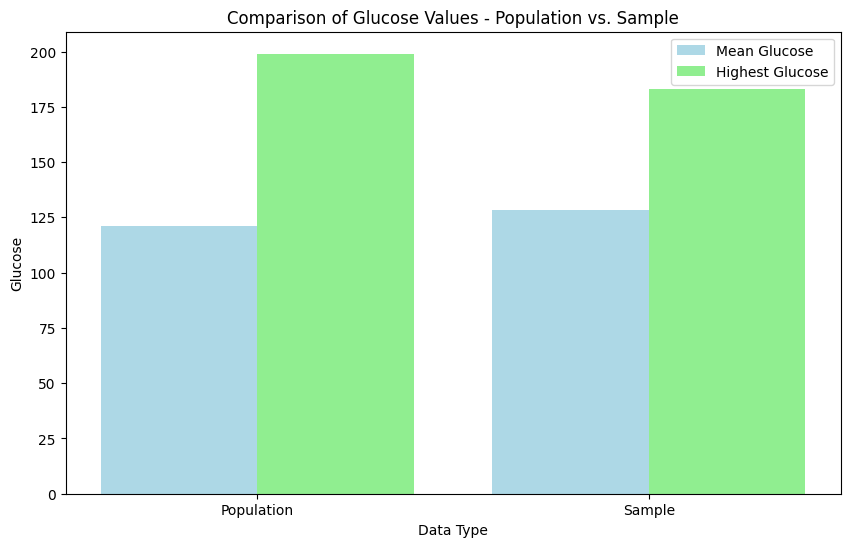

In [51]:
# Create Bar Chart for Comparison
plt.figure(figsize=(10, 6))

bar_labels = ['Population', 'Sample']
bar_mean_values = [population_mean_glucose, sample_mean_glucose]
bar_highest_values = [population_highest_glucose, sample_highest_glucose]

# Bar positions
bar_positions_mean = np.arange(len(bar_labels))
bar_positions_highest = [pos + 0.4 for pos in bar_positions_mean]

# Bar width
bar_width = 0.4

plt.bar(bar_positions_mean, bar_mean_values, width=bar_width, color='lightblue', label='Mean Glucose')
plt.bar(bar_positions_highest, bar_highest_values, width=bar_width, color='lightgreen', label='Highest Glucose')

plt.title("Comparison of Glucose Values - Population vs. Sample")
plt.xlabel("Data Type")
plt.ylabel("Glucose")
plt.xticks([pos + bar_width / 2 for pos in bar_positions_mean], bar_labels)
plt.legend()
plt.show()

# **Task 2:**

In [38]:
# Calculate the 98th percentile of BMI for the sample and population
sample_percentile_98 = np.percentile(sample_data['BMI'], 98)
population_percentile_98 = np.percentile(diabetes_data['BMI'], 98)

In [39]:
# Compare Percentiles
print("98th Percentile of BMI - Sample:", sample_percentile_98)
print("98th Percentile of BMI - Population:", population_percentile_98)

98th Percentile of BMI - Sample: 41.668
98th Percentile of BMI - Population: 47.52599999999996


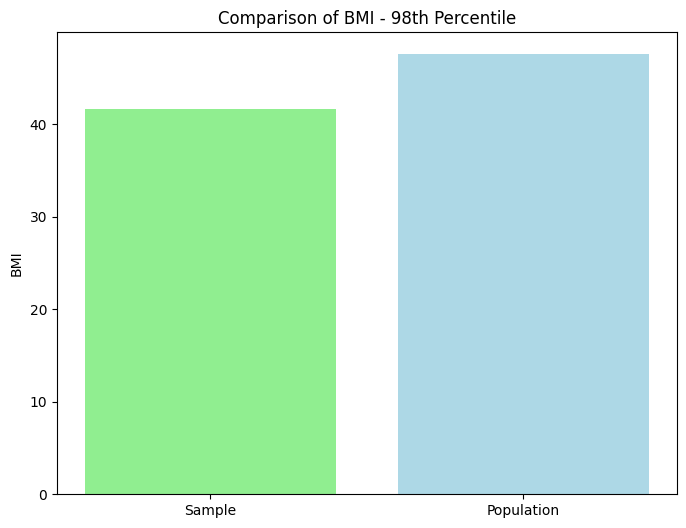

In [40]:
# Create Bar Chart for Comparison
plt.figure(figsize=(8, 6))
bar_labels = ['Sample', 'Population']
bar_values = [sample_percentile_98, population_percentile_98]

plt.bar(bar_labels, bar_values, color=['lightgreen', 'lightblue'])
plt.title("Comparison of BMI - 98th Percentile")
plt.ylabel("BMI")
plt.show()

# **Task 3:**

In [41]:
# Number of bootstrap samples and sample size
num_samples = 500
sample_size = 150


In [42]:
# Initialize arrays to store bootstrap statistics
bootstrap_means = np.zeros(num_samples)
bootstrap_std_devs = np.zeros(num_samples)
bootstrap_percentiles = np.zeros(num_samples)

In [43]:
# Perform bootstrap sampling
for i in range(num_samples):
    bootstrap_sample = np.random.choice(diabetes_data['BloodPressure'], size=sample_size, replace=True)

    # Calculate statistics for the bootstrap sample
    bootstrap_means[i] = np.mean(bootstrap_sample)
    bootstrap_std_devs[i] = np.std(bootstrap_sample)
    bootstrap_percentiles[i] = np.percentile(bootstrap_sample, 50)


In [44]:
# Calculate population statistics for comparison
population_mean = np.mean(diabetes_data['BloodPressure'])
population_std_dev = np.std(diabetes_data['BloodPressure'])
population_percentile = np.percentile(diabetes_data['BloodPressure'], 50)

In [45]:
# Compare Statistics
print("Population Mean BloodPressure:", population_mean)
print("Population Standard Deviation BloodPressure:", population_std_dev)
print("Population Median BloodPressure:", population_percentile)


Population Mean BloodPressure: 69.10546875
Population Standard Deviation BloodPressure: 19.343201628981696
Population Median BloodPressure: 72.0


In [46]:
# Print the average bootstrap statistics
print("Average Bootstrap Mean BloodPressure:", np.mean(bootstrap_means))
print("Average Bootstrap Standard Deviation BloodPressure:", np.mean(bootstrap_std_devs))
print("Average Bootstrap Median BloodPressure:", np.mean(bootstrap_percentiles))

Average Bootstrap Mean BloodPressure: 69.07224000000001
Average Bootstrap Standard Deviation BloodPressure: 19.212853353133614
Average Bootstrap Median BloodPressure: 71.479


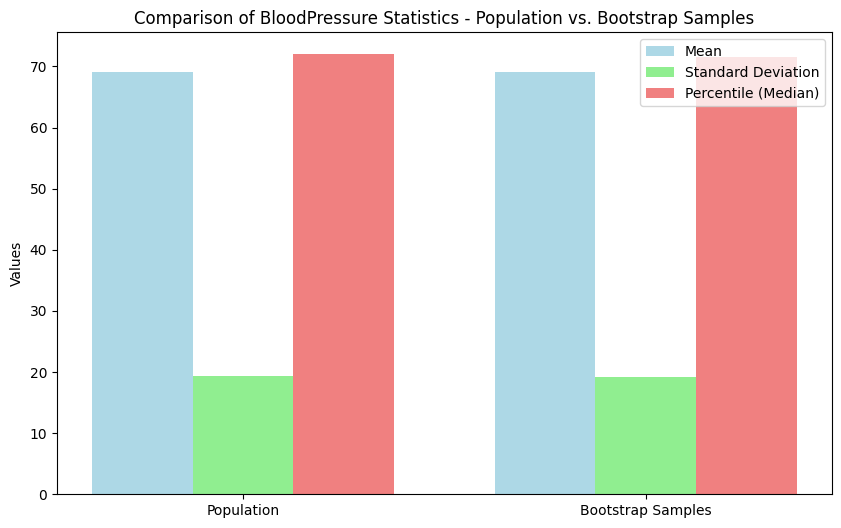

In [47]:
# Create a Grouped Bar Chart
labels = ['Population', 'Bootstrap Samples']
mean_values = [population_mean, np.mean(bootstrap_means)]
std_dev_values = [population_std_dev, np.mean(bootstrap_std_devs)]
percentile_values = [population_percentile, np.mean(bootstrap_percentiles)]

x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25  # the width of the bars

rects1 = ax.bar(x - bar_width, mean_values, bar_width, label='Mean', color='lightblue')
rects2 = ax.bar(x, std_dev_values, bar_width, label='Standard Deviation', color='lightgreen')
rects3 = ax.bar(x + bar_width, percentile_values, bar_width, label='Percentile (Median)', color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Values')
ax.set_title('Comparison of BloodPressure Statistics - Population vs. Bootstrap Samples')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()